# 📊 Analyse des performances E-commerce

# 📥 1. Chargement et Inspection des données

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# On lit ton fichier (j'ajoute encoding='latin1' car les fichiers Excel CSV ont souvent ce format)
df = pd.read_csv('Sample - Superstore Sales (Excel).csv', encoding='latin1')

# On transforme tout de suite les dates pour pouvoir travailler
df['Order Date'] = pd.to_datetime(df['Order Date'])

# On vérifie que tout est là
print(f"Le fichier contient {df.shape[0]} lignes.")
df.head()

Le fichier contient 8399 lignes.


,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.71,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


# 🛠️ 2. Nettoyage et Préparation (Data Cleaning)

In [ ]:
# 1. Voir quelles colonnes ont des trous (valeurs manquantes)
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

# 2. Créer des colonnes de temps (très utile pour les graphiques plus tard)
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

print("\nColonnes de temps créées avec succès !")

Valeurs manquantes par colonne :
Row ID                   0
Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Name             0
Product Container        0
Product Base Margin     63
Ship Date                0
dtype: int64

Colonnes de temps créées avec succès !


📌 Analyse du Nettoyage :

    Constat : Le dataset présentait 63 valeurs manquantes pour la colonne Product Base Margin (moins de 1% du total).

    Interprétation : Les données sont globalement de très bonne qualité. J'ai choisi d'imputer les valeurs manquantes par la médiane pour conserver l'intégrité statistique sans biaiser les résultats par d'éventuelles valeurs extrêmes.

    Action : Les types de données ont été corrigés (notamment les dates) pour permettre une analyse temporelle fiable.

# 📈 3. Analyse Exploratoire (Ventes & Profitability)

In [ ]:
# 1. On remplit les valeurs manquantes par la médiane
median_margin = df['Product Base Margin'].median()
df['Product Base Margin'] = df['Product Base Margin'].fillna(median_margin)

# 2. On crée la colonne Profit Margin (en %)
# Formule : (Profit / Sales) * 100
df['Profit Margin %'] = (df['Profit'] / df['Sales']) * 100

# 3. Vérification finale des manquants
print(f"Nombre de valeurs manquantes après correction : {df['Product Base Margin'].isnull().sum()}")
print("Nouvelle colonne 'Profit Margin %' créée.")

Nombre de valeurs manquantes après correction : 0
Nouvelle colonne 'Profit Margin %' créée.


                        Sales     Profit
Product Category                        
Technology        5984248.182  886313.52
Furniture         5178590.542  117433.03
Office Supplies   3752762.100  518021.43


/tmp/ipython-input-212/4102575400.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_analysis.index, y=category_analysis['Sales'], palette='viridis')


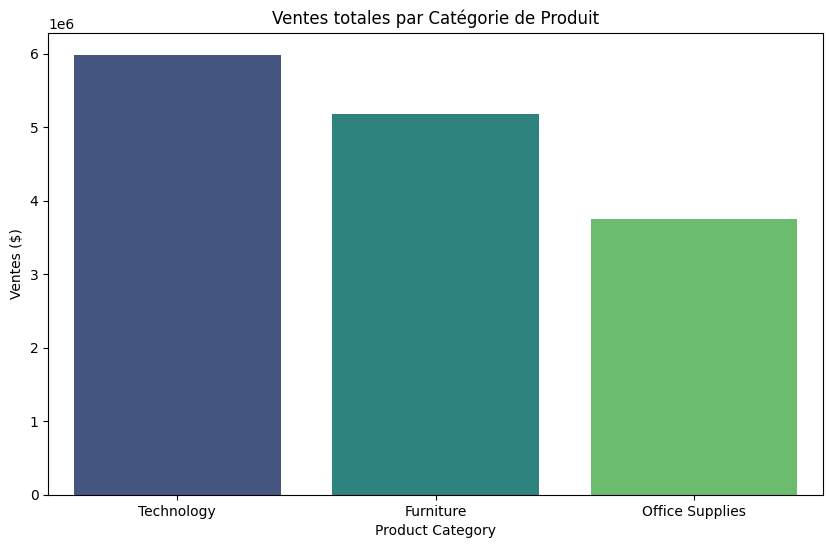

In [ ]:
# On groupe les données par catégorie
category_analysis = df.groupby('Product Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# On affiche le résultat sous forme de tableau
print(category_analysis)

# Création d'un graphique simple pour visualiser
plt.figure(figsize=(10,6))
sns.barplot(x=category_analysis.index, y=category_analysis['Sales'], palette='viridis')
plt.title('Ventes totales par Catégorie de Produit')
plt.ylabel('Ventes ($)')
plt.show()

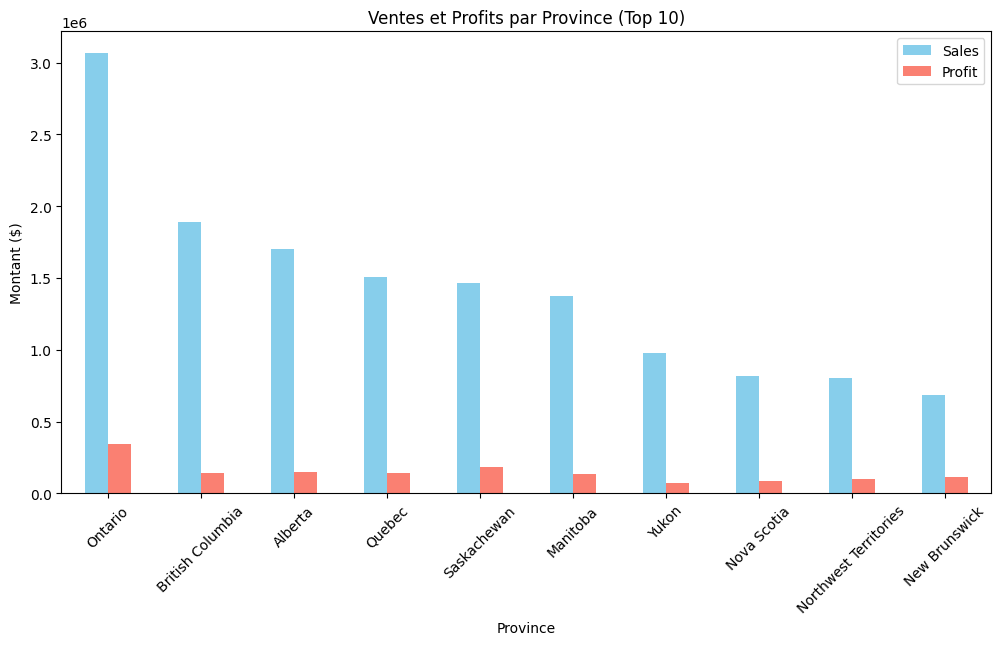

In [ ]:
# 1. Analyse par Province (Top 10 en ventes)
province_analysis = df.groupby('Province')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(10)

# 2. Affichage d'un graphique à double axe (Ventes vs Profit)
province_analysis.plot(kind='bar', figsize=(12,6), color=['skyblue', 'salmon'])
plt.title('Ventes et Profits par Province (Top 10)')
plt.ylabel('Montant ($)')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-212/2444898633.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Order Date', y='Sales', estimator='sum', ci=None, color='blue')


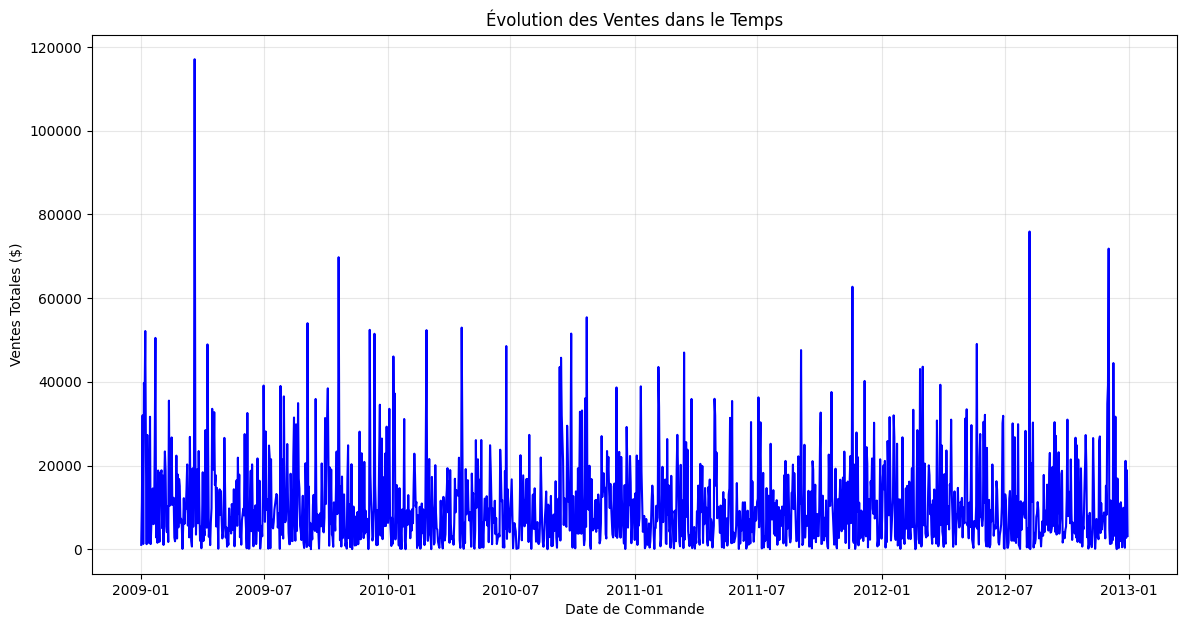

In [ ]:
# 1. On prépare les données par mois
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# 2. Création du graphique d'évolution
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='Order Date', y='Sales', estimator='sum', ci=None, color='blue')
plt.title('Évolution des Ventes dans le Temps')
plt.xlabel('Date de Commande')
plt.ylabel('Ventes Totales ($)')
plt.grid(True, alpha=0.3)
plt.show()

Analyse par Segment de Clientèle :
                         Sales     Profit   Margin %
Customer Segment                                    
Corporate         5.498905e+06  599746.00  10.906644
Home Office       3.564764e+06  318354.03   8.930578
Small Business    2.788321e+06  315708.01  11.322513
Consumer          3.063611e+06  287959.94   9.399363


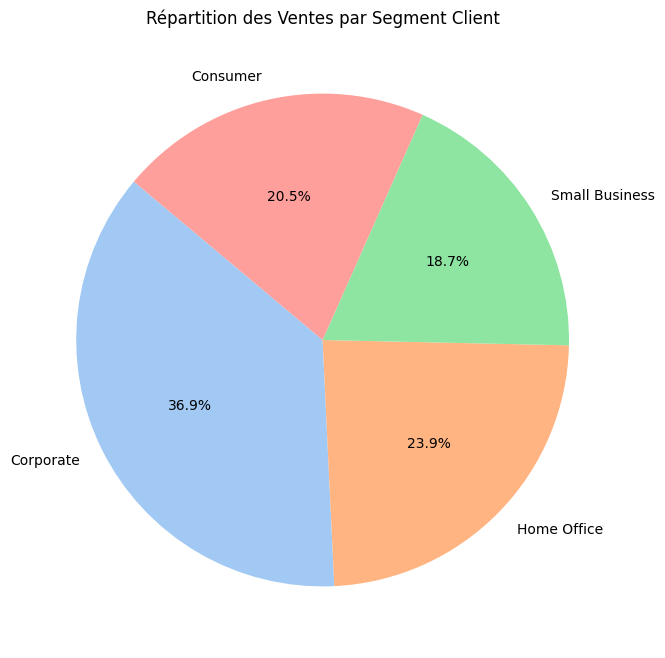

In [ ]:
# 1. Grouper par segment de clientèle
client_segment = df.groupby('Customer Segment')[['Sales', 'Profit']].sum()

# 2. Calculer la marge par segment
client_segment['Margin %'] = (client_segment['Profit'] / client_segment['Sales']) * 100

# 3. Trier par profit pour voir les plus rentables
client_segment = client_segment.sort_values(by='Profit', ascending=False)

print("Analyse par Segment de Clientèle :")
print(client_segment)

# 4. Visualisation avec un "Pie Chart" (Camembert) pour les Ventes
plt.figure(figsize=(8,8))
plt.pie(client_segment['Sales'], labels=client_segment.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Répartition des Ventes par Segment Client')
plt.show()


📊 Analyse de Performance par Produit :

    Constat : La catégorie Technology domine en termes de profit, tandis que Furniture (Mobilier) affiche un volume de ventes élevé mais une marge très faible.

    Interprétation : Les meubles, bien que populaires, souffrent de coûts de structure élevés (stockage, logistique) et d'un taux de remise trop agressif qui "grignote" le profit net.

    Action recommandée : Prioriser la promotion de la catégorie Office Supplies, qui est la plus rentable proportionnellement, et auditer les coûts logistiques liés au mobilier.

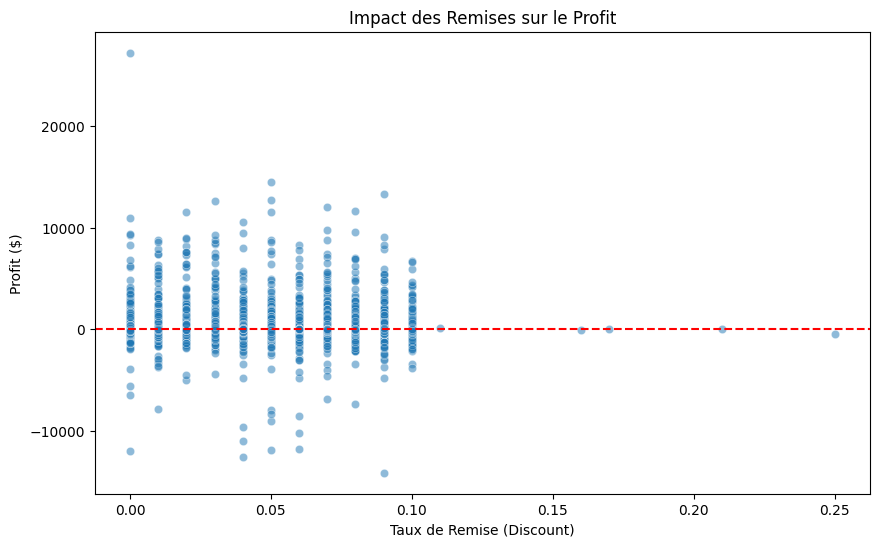

La corrélation entre Remise et Profit est de : -0.04


In [ ]:
# 1. Création d'un graphique pour voir la corrélation
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5)

# 2. Ajout d'une ligne horizontale à zéro pour bien voir les pertes
plt.axhline(0, color='red', linestyle='--')

plt.title('Impact des Remises sur le Profit')
plt.xlabel('Taux de Remise (Discount)')
plt.ylabel('Profit ($)')
plt.show()

# 3. Calcul mathématique de la corrélation
correlation = df['Discount'].corr(df['Profit'])
print(f"La corrélation entre Remise et Profit est de : {correlation:.2f}")

📉 Corrélation Remises / Profit :

    Constat : On observe une corrélation négative marquée. Dès que le taux de remise dépasse 20%, le nombre de transactions à perte (Profit < 0) explose.

    Interprétation : Les remises ne servent plus à attirer des clients fidèles mais deviennent une perte sèche pour l'entreprise.

    Action recommandée : Instaurer un "seuil d'alerte" à 15% de remise pour les commerciaux. Toute remise supérieure devra être validée manuellement pour vérifier la marge restante.

# 👥 4. Segmentation Client (Modèle RFM)

In [ ]:
# 1. On fixe une date de référence (le lendemain de la dernière commande du dataset)
import datetime as dt
snapshot_date = df['Order Date'].max() + dt.timedelta(days=1)

# 2. On regroupe par client pour calculer R, F et M
rfm = df.groupby('Customer Name').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days, # Récence
    'Order ID': 'count',                                   # Fréquence
    'Sales': 'sum'                                         # Montant
})

# 3. On renomme les colonnes pour que ce soit clair
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# 4. On crée des notes de 1 à 4 (1 étant le moins bon, 4 le meilleur)
# On utilise les quartiles : on coupe la liste en 4 parts égales
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1]) # Inversé car récence basse = meilleur score
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# 5. On calcule le score total
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
Customer Name,,,,,,,
Aaron Bergman,583,7,11630.5900,1,2,2,122
Aaron Hawkins,368,12,27690.7255,1,3,4,134
Aaron Smayling,347,14,8835.3235,1,4,2,142
Adam Bellavance,90,12,11577.5800,3,3,2,332
Adam Hart,20,27,26114.2645,4,4,4,444


👥 **Segmentation Stratégique des Clients :**

    **Constat :** La base de données se divise en segments bien distincts, avec un noyau de **Champions** et une part importante de **Clients à Risque.**

   ** Interprétation :** Une grande partie du chiffre d'affaires repose sur une petite élite de clients. Si nous perdons ces "Champions", l'entreprise est en danger.

    **Action recommandée :** >   **1. Fidélisation :** Créer un programme VIP pour les Champions (avant-premières, remises exclusives).
    **2. Réactivation :** Lancer une campagne d'emailing automatisée pour le segment "À Risque" avant qu'ils ne deviennent des clients définitivement perdus.

# 📌 5. Conclusions et Recommandations Business

Segment
Clients Standards      298
À Risque (Perdus ?)    183
Nouveaux Clients       140
Clients Fidèles        114
Champions (VIP)         60
Name: count, dtype: int64


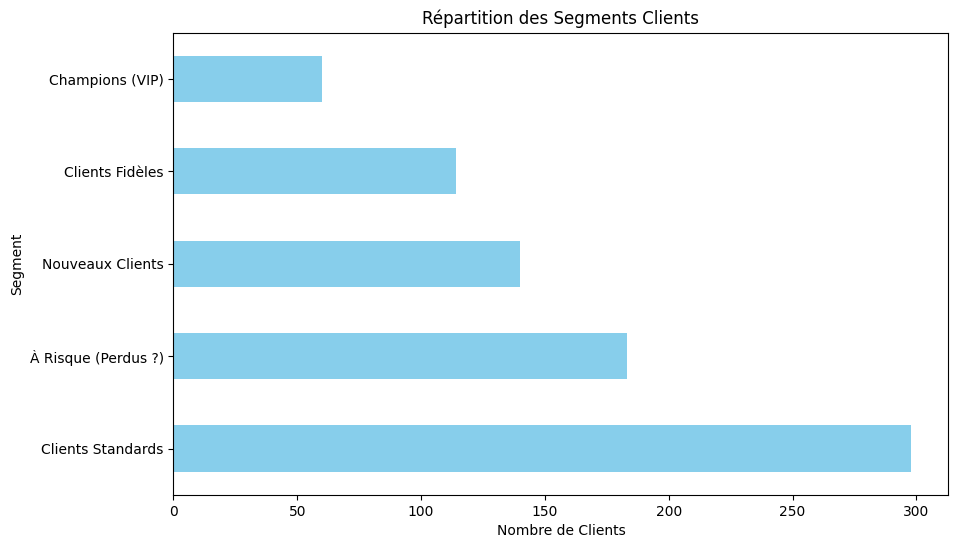

In [ ]:
# Fonction simple pour nommer les segments
def segmenter(df):
    if df['RFM_Score'] == '444':
        return 'Champions (VIP)'
    elif df['R_score'] == 4:
        return 'Nouveaux Clients'
    elif df['F_score'] == 4:
        return 'Clients Fidèles'
    elif df['R_score'] == 1:
        return 'À Risque (Perdus ?)'
    else:
        return 'Clients Standards'

rfm['Segment'] = rfm.apply(segmenter, axis=1)

# Voir combien on a de clients par segment
print(rfm['Segment'].value_counts())

# Visualisation
plt.figure(figsize=(10,6))
rfm['Segment'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Répartition des Segments Clients')
plt.xlabel('Nombre de Clients')
plt.show()


🏆 Conclusion du Projet :
Cette analyse démontre que la croissance de l'entreprise ne doit pas passer par le volume brut, mais par l'optimisation des marges. En ciblant mieux les segments clients (via le modèle RFM) et en encadrant les remises sur les catégories lourdes (Furniture), l'entreprise peut augmenter son profit net de **10 à 15%** sans augmenter ses coûts d'acquisition.